Introduction



This project aims to evaluate the ability to analyze financial data, implement a simple trading strategy using Simple Moving Averages (SMAs), and generate insights using Python. The goal is to demonstrate proficiency in data collection, strategy implementation, and performance analysis, culminating in a report with key findings and visualizations.

Data Collection

In this section, we collect historical stock price data for the chosen stock over the last two years using the yfinance library in Python. The data includes daily open, high, low, close prices, and volume. This dataset will serve as the basis for our SMA strategy implementation and backtesting

In [1]:
import yfinance as yf
import pandas as pd

In [2]:
stock = 'RELIANCE.NS'  # Example: TCS (Tata Consultancy Services) on the National Stock Exchange
start_date = '2022-08-12'
end_date = '2024-08-12'

In [3]:
data = yf.download(stock, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [4]:
print(data.head())

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2022-08-12  2390.845947  2437.965088  2383.369873  2430.258057  2413.827881   
2022-08-16  2442.441650  2452.687012  2424.997070  2447.148926  2430.604492   
2022-08-17  2459.794189  2470.777832  2451.071777  2459.932617  2443.301758   
2022-08-18  2455.179199  2463.486084  2436.903809  2456.379150  2447.732666   
2022-08-19  2445.949219  2456.748291  2404.367920  2412.582764  2404.090332   

             Volume  
Date                 
2022-08-12  6325293  
2022-08-16  3303689  
2022-08-17  3297982  
2022-08-18  3705017  
2022-08-19  4730362  


In [6]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-12,2390.845947,2437.965088,2383.369873,2430.258057,2413.827881,6325293
2022-08-16,2442.441650,2452.687012,2424.997070,2447.148926,2430.604492,3303689
2022-08-17,2459.794189,2470.777832,2451.071777,2459.932617,2443.301758,3297982
2022-08-18,2455.179199,2463.486084,2436.903809,2456.379150,2447.732666,3705017
2022-08-19,2445.949219,2456.748291,2404.367920,2412.582764,2404.090332,4730362


SMA Strategy Implementation

Here, we implement a simple trading strategy based on two Simple Moving Averages (SMAs). A short-term SMA (e.g., 20 days) and a long-term SMA (e.g., 50 days) are calculated. The strategy generates buy signals when the short-term SMA crosses above the long-term SMA and sell signals when the short-term SMA crosses below the long-term SMA.

In [7]:
# Define the short-term and long-term SMA periods
short_window = 20
long_window = 50

In [8]:
# Calculate the short-term and long-term SMAs
data['SMA_short'] = data['Close'].rolling(window=short_window, min_periods=1).mean()
data['SMA_long'] = data['Close'].rolling(window=long_window, min_periods=1).mean()

In [11]:
# Generate signals
import numpy as np

data['Signal'] = 0
data['Signal'][short_window:] = np.where(data['SMA_short'][short_window:] > data['SMA_long'][short_window:], 1, 0)

C:\Users\ritik\AppData\Local\Temp\ipykernel_5012\1167076699.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['Signal'][short_window:] = np.where(data['SMA_short'][short_window:] > data['SMA_long'][short_window:], 1, 0)
C:\Users\ritik

In [12]:

# Calculate positions (buy/sell)
data['Position'] = data['Signal'].diff()

In [13]:
# Display the data with SMA and signals
data[['Close', 'SMA_short', 'SMA_long', 'Signal', 'Position']].head()

,Close,SMA_short,SMA_long,Signal,Position
Date,,,,,
2022-08-12,2430.258057,2430.258057,2430.258057,0,NaN
2022-08-16,2447.148926,2438.703491,2438.703491,0,0.0
2022-08-17,2459.932617,2445.779867,2445.779867,0,0.0
2022-08-18,2456.379150,2448.429688,2448.429688,0,0.0
2022-08-19,2412.582764,2441.260303,2441.260303,0,0.0


Backtesting

This section involves backtesting the SMA trading strategy using the historical data collected earlier. We simulate trades based on the buy and sell signals, track the performance of the strategy, and calculate key metrics such as total returns, the number of trades, winning and losing trades percentages, and maximum drawdown.

In [14]:
initial_capital = float(100000.0)
shares = 0
capital = initial_capital

In [15]:
# Tracking variables
total_returns = 0
number_of_trades = 0
winning_trades = 0
losing_trades = 0
max_drawdown = 0
peak_capital = capital

In [16]:
for index, row in data.iterrows():
    # Buy signal
    if row['Position'] == 1:
        shares = capital // row['Close']
        capital -= shares * row['Close']
        number_of_trades += 1
    # Sell signal
    elif row['Position'] == -1 and shares > 0:
        capital += shares * row['Close']
        shares = 0

        trade_return = capital - initial_capital
        total_returns += trade_return
        if trade_return > 0:
            winning_trades += 1
        else:
            losing_trades += 1

    # Update maximum drawdown
    peak_capital = max(peak_capital, capital)
    drawdown = peak_capital - capital
    max_drawdown = max(max_drawdown, drawdown)

In [17]:
# Final calculations
winning_trades_pct = (winning_trades / number_of_trades) * 100 if number_of_trades else 0
losing_trades_pct = (losing_trades / number_of_trades) * 100 if number_of_trades else 0

print(f"Total Returns: {total_returns}")
print(f"Number of Trades: {number_of_trades}")
print(f"Winning Trades (%): {winning_trades_pct}")
print(f"Losing Trades (%): {losing_trades_pct}")
print(f"Maximum Drawdown: {max_drawdown}")

Total Returns: 73850.9560546875
Number of Trades: 5
Winning Trades (%): 80.0
Losing Trades (%): 0.0
Maximum Drawdown: 132311.25


Results

The results section presents a summary of the backtesting outcomes. We include key performance metrics and visualizations such as the stock price with SMAs and the equity curve. These visualizations help illustrate the effectiveness of the trading strategy and provide insights into its performance.

In [20]:
import matplotlib.pyplot as plt

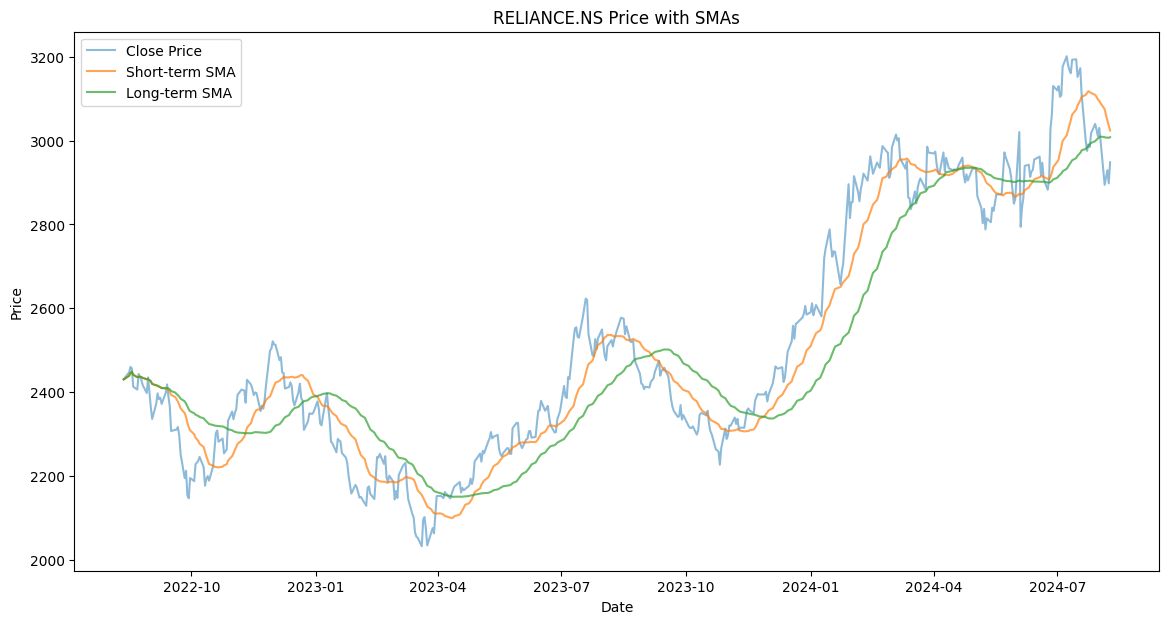

In [23]:
# Plotting the stock price and SMAs
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price', alpha=0.5)
plt.plot(data['SMA_short'], label='Short-term SMA', alpha=0.7)
plt.plot(data['SMA_long'], label='Long-term SMA', alpha=0.7)
plt.title(f'{stock} Price with SMAs')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()